# KNN分类模型转化回归模型（底层）

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 样本特征
data_X =[
    [1.3,6],
    [3.5,5],
    [4.2,2],
    [5,3.3],
    [2,9],
    [5,7.5],
    [7.2,4],
    [8.1,8],
    [9,2.5]
]

In [12]:
# 样本标记
data_Y = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7]

In [13]:
# 训练集
X_train = np.array(data_X)
Y_train = np.array(data_Y)

In [31]:
# 新的样本点
data_new = np.array([4,5])

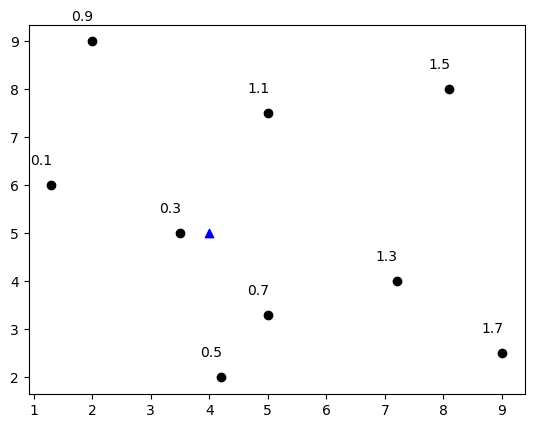

In [71]:
plt.scatter(X_train[:,0], X_train[:,1],color='black')
plt.scatter(data_new[0],data_new[1],color='blue',marker='^')
for i in range(len(Y_train)):
    plt.annotate(
        Y_train[i],
        # 标注内容，即数据对应的标签值
        xy=X_train[i],
        # 标注关联的坐标点，'xy'设定标签对应的原始数据点位置
        # xy=X_train[i]表示注释关联到X_train中的第i个数据点的坐标位置
        xytext=(-15,15),
        # 标签文本的偏移量，横向-15，纵向-15（单位由'textcoords'定义）
        textcoords='offset points'
        # 明确'xytext'的单位是"点(point)"即相当于'xy'位置的偏移量
    )
    
plt.show()

## KNN的预测过程

### 1.计算样本点与已知样本点的距离

In [38]:
for data in X_train:
    print(np.sqrt(np.sum((data - data_new)**2)))

2.879236009777594
0.5
3.006659275674582
1.9723082923316022
4.47213595499958
2.692582403567252
3.3526109228480423
5.080354318352215
5.5901699437494745


In [40]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in X_train]
distances

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

### 2.按距离排序

In [43]:
np.sort(distances)
distances
# 注意此步并不改变distances本身元素的排列

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

In [45]:
sort_index = np.argsort(distances)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64)

### 确定k的值

In [48]:
k = 5

### 4.距离最近的k个点投票

In [51]:
first_k = [Y_train[i] for i in sort_index[:k]]
first_k
#这一步是将离data_new最近的K个样本点的下标索引所对应的样本标记放进first_k数组当中

[0.3, 0.7, 1.1, 0.1, 0.5]

In [73]:
k = 5
first_k = [Y_train[i] for i in sort_index[:k]]
np.mean(first_k)

0.54